# Resumen

Se determinó el volúmen de un cilindro. Para esto se utilizaron diversos instrumentos de medida longitudinal con los cuales se obtuvieron la medidas indirectas del volumen, utilizando el método de propagación de incertezas con derivadas parciales.

# Introduccion

Se determinó el volúmen de un cilindro (Figura 1). La motivación es comparar los resultados de dicha magnitud conseguida a través de distintos procedimientos y variables (fórmula del volumen según diámetro/altura o perímetro/altura).


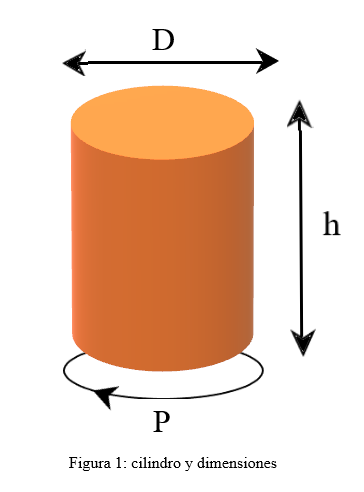

In [10]:
from IPython.display import Image

Image(filename="img/cilindro.png", width=150)

Para el cilindro de variables $(D, h)$:

\begin{equation}
V_c = \pi \frac{D^2}{4}h 
\end{equation}
\begin{equation}
\Delta V = \pi \frac{\Delta D}{2} h + \pi \frac{D^2}{4}\Delta h
\end{equation}

Luego, para el cilindro con variables $(P, h)$:

\begin{equation}
V_c = \frac{1}{\pi}\frac{p^2}{4}h
\end{equation}
\begin{equation}
\Delta V = \frac{1}{\pi}\frac{\Delta p}{2}h + \frac{1}{\pi}\frac{p^2}{4}\Delta h
\end{equation}

# Metodo experimental

El instrumental utilizado para llevar a cabo el experimento fue: 
* Una regla (de sensibilidad 1 mm)
* Una cuerda (de sensibilidad 5 mm)
* Un calibre (de sensibilidad 0.05 mm). 

Para determinar la incerteza instrumental de la cuerda, la tensamos en distintas proporciones (ya que no podemos asegurar la magnitud de la tensión de la cuerda con la que medimos el cilindro) y medimos repetidas veces, obteniendo las variaciones de las medidas, y así tomar un promedio.

Empezamos por determinar el volumen del cilindro $(D,H)$.  Para medir el diámetro y la altura del cilindro utilizamos el calibre, medimos repetidas veces cada variable y calculamos el número óptimo de medidas, definido como 

$$N_{op} = \left(\frac{S}{\sigma_{nom}}\right)^2$$

Siendo S la desviación estándar y el sigma nominal en este caso el error instrumental. Una vez calculado, volvimos a medir más veces y repetimos el cálculo del número óptimo de medidas, una vez qué llegamos al número deseado, paramos de medir.  

Para el perímetro utilizamos una cuerda, rodeando repetidas ocasiones el cilindro, marcándolo y luego lo desplegamos para medirlo con una regla. Tomamos el valor de las incertezas conjuntas de la regla y del hilo como la utilizada para determinar el valor del intervalo referido al perímetro.

Calculamos el error relativo de las incertezas de las magnitudes obtenidas. La magnitud que medimos de forma indirecta fue el volúmen, con dos distintas fórmulas ya antes mencionadas en la introducción.

# Resultados

In [111]:
# Importamos librerias necesarias
import numpy as np
# Se define para obtener los mismos numeros aleatorios
np.random.seed(23)

*Nota:* Los datos originales se extraviaron, a continuacion se trabaja con un set de datos generados que lleva a los mismos resultados

In [106]:
def generate_sample(shape: int):
    """Funcion generadora de medidas para cilindro de laboratorio.
    
    Los valores fijos de diametro, altura y perimetro estan determinados,
    con la base de que el cilindro original tiene medidas "exactas" de 
    d = 50.00 mm, h = 50.00 mm y p = 160.00 mm.
    
    Para los valores calculados, se tomo en cuenta:
    
    1) Que el diametro y la altura se midieron con calibre y el perimetro 
    con una cuerda (incerteza estimada en la ejecucion de la practica).
    
    2) Una maxima dispersion de dos unidades de sensibilidad. Es decir, si 
    el calibre tiene una incerteza de 0.05 mm, la medida mas pequena o mas 
    grande sera +/- 0.1 mm
    
    Input :
    -------
        * shape : int. Entero con la cantidad de datos a generar.
        
    Output : 
    --------
        * d, h, p : array-like. Lista con los conjutos de cada medida.
    
    """
    # Creamos el conjunto de medidas para el diametro
    # 10 medidas, con valor 50.0 mm
    d = np.full(10, 50.0)
    # Generamos el conjunto que representa errores, en la escala del calibre
    de = np.round((np.random.random(10)*0.2 - 0.1)/5, 2)*5

    # Unimos ambos para obtener medidas reales
    d = d + de

    # Repetimos para la altura
    h = np.full(10, 50.0)
    he = np.round((np.random.random(10)*0.2 - 0.1)/5, 2)*5
    h = h + he

    # Repetimos para el perimetro
    p = np.full(10, 160.0)
    pe = np.round((np.random.random(10)*2 -1)/5, 1)*5
    p = p + pe
    
    return d, h, p

In [107]:
d, h, p = generate_sample(10)

Para cada una obtenemos el promedio con su incerteza

In [108]:
print(f"d = ({round(d.mean(), 2)} \u00B1 0.05) mm")
print(f"h = ({round(h.mean(), 2)} \u00B1 0.05) mm")
print(f"p = ({round(p.mean())} \u00B1 5) mm")

d = (50.0 ± 0.05) mm
h = (50.0 ± 0.05) mm
p = (160 ± 5) mm


Y los volumenes correspondientes son:

In [109]:
# Calculamos volumen utilizando el diametro
vd = np.pi * ((d.mean())**2 / 4) * h.mean()
# Calculamos utilizando el perimetro
vp = (1/np.pi) * (p.mean()**2 / 4) * h.mean()

# Definimos las incertezas de cada promedio
Dd = 0.05 # mm
Dh = 0.05 # mm
Dp = 5 # mm

# Calculamos incerteza de cada volumen
Dvd = (np.pi * (Dd / 2) * h.mean()) + (np.pi * (d.mean()**2 / 4) * Dh)
Dvp = ((1/np.pi) * (Dp / 2) * h.mean()) + ((1/np.pi) * (p.mean()**2 / 4) * Dh)

print(f"Vd = ({round(vd/1000,2)} \u00B1 {round(Dvd/1000,2)}) cm^3")
print(f"Vp = ({round(vp/1000,2)} \u00B1 {round(Dvp/1000,2)}) cm^3")

Vd = (98.19 ± 0.1) cm^3
Vp = (101.8 ± 0.14) cm^3


Y comprobamos los errores relativos
\begin{equation}
V_{r,d} = \frac{\Delta V}{V_d}
\end{equation}

In [110]:
print(f"V_rd = {round(Dvd / vd, 5)}")
print(f"V_rp = {round(Dvp / vp, 5)}")

V_rd = 0.00104
V_rp = 0.00139


# Conclusion

De los dos resultados obtenidos, podemos comparar sus errores relativos. Se observa  que la medida que presenta menor incertidumbre relativa es la obtenida por la medida del diámetro. Este hecho se debe a que la medida directa tomada con el calibre del diámetro ofrece mayor precisión en comparación con la medida de la cuerda. Así, el volumen para el cilindro es 

\begin{equation}
V = (98.19 \pm 0.10) cm^3
\end{equation}